# Portfolio Optimization using the Sharpe Ratio

This Jupyter Notebook is dedicated to the optimization of a stock/mutual fund portfolio using the Sharpe Ratio. The Sharpe Ratio is a measure for calculating risk-adjusted return, and this analysis aims to maximize this ratio in a portfolio.

## Introduction

In finance, the Sharpe Ratio is one of the most important metrics for comparing the expected returns of an investment to its risk. By optimizing a portfolio for the highest Sharpe Ratio, we aim to achieve the best possible return for the lowest risk.

This project will walk through the data collection, cleaning, visualization, correlation and covariance analysis, and finally, the optimization process using the Efficient Frontier.


In [45]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## funds selected for testing the model
#### The funds selected have not been particulrly researched for this analysis, this is only to test the methodology
Pacer Trendpilot 100 (PTNQ) RiverPark Long/Short Opportunity (RLSIX, RLSFX) above two have been mentioned for their lower correlation with the S&P 500 and bonds​

Payson Total Return (PBFDX): This fund has shown a 5-year return of 17.13% State Street US Core Equity Fund (SSAQX): With a 5-year return of 17.04%

In [46]:
from datetime import datetime as dt

today = dt.today().date()
today

datetime.date(2024, 1, 16)

## Data Collection

The data for this analysis comprises historical adjusted close prices for a selection of stocks/mutual funds. The data is sourced from an appropriate financial database.

Let's load the data and take an initial look at its structure.


In [47]:
# Code to fetch and load data
# Assume 'data' is a pandas DataFrame containing the fetched data
test_data = yf.download(" PTNQ RLSIX PBFDX SSAQX TEM.L ARKW ENIAX PGHY", start="2016-03-01", end=today)
mf_data = test_data['Adj Close']
mf_data.tail()

[*********************100%***********************]  8 of 8 completed


,ARKW,ENIAX,PBFDX,PGHY,PTNQ,RLSIX,SSAQX,TEM.L
Date,,,,,,,,
2024-01-09,72.739998,7.91,28.650000,19.620001,65.139999,12.20,68.290001,146.199997
2024-01-10,72.660004,7.91,28.820000,19.670000,65.489998,12.34,68.709999,146.000000
2024-01-11,71.400002,7.92,28.870001,19.780001,65.449997,12.38,68.739998,145.800003
2024-01-12,70.169998,7.93,28.950001,19.809999,65.440002,12.41,68.790001,146.399994
2024-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.399994


In [48]:
#removing today and yesterday as information not available usually
from datetime import timedelta as td
start = today - td(days = (8*365)) #ignoring leap year for the saske of simplicity
DByesterday = today - td(days = 2)
print(start, DByesterday)

2016-01-18 2024-01-14


In [49]:
test_data = yf.download(" PTNQ RLSIX PBFDX SSAQX TEM.L ARKW ENIAX PGHY", start=start, end=DByesterday)
mf_data = test_data['Adj Close']
mf_data.tail()

[*********************100%***********************]  8 of 8 completed


,ARKW,ENIAX,PBFDX,PGHY,PTNQ,RLSIX,SSAQX,TEM.L
Date,,,,,,,,
2024-01-08,73.709999,7.90,28.660000,19.490000,65.070000,12.15,68.309998,147.000000
2024-01-09,72.739998,7.91,28.650000,19.620001,65.139999,12.20,68.290001,146.199997
2024-01-10,72.660004,7.91,28.820000,19.670000,65.489998,12.34,68.709999,146.000000
2024-01-11,71.400002,7.92,28.870001,19.780001,65.449997,12.38,68.739998,145.800003
2024-01-12,70.169998,7.93,28.950001,19.809999,65.440002,12.41,68.790001,146.399994


## Data Visualization

To understand the trends and patterns in our data, we will visualize the adjusted close prices over time for each fund in our selection.


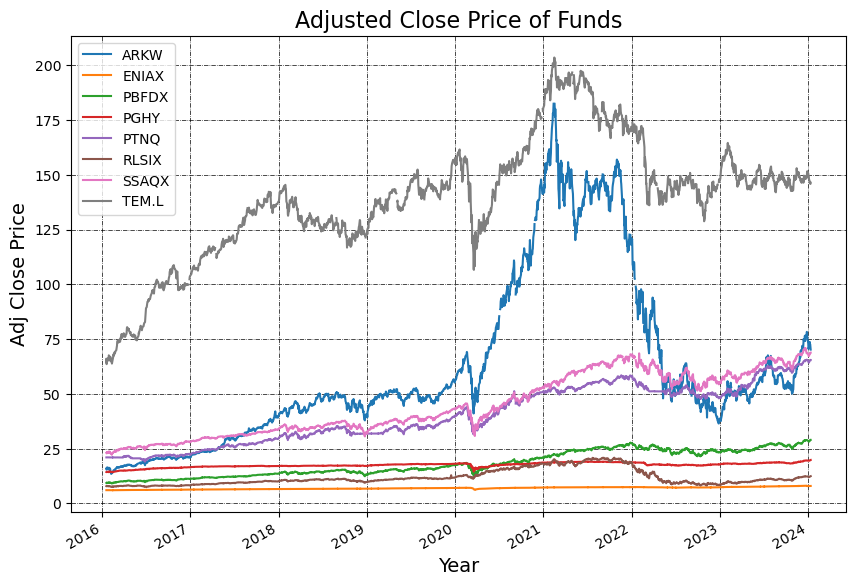

In [50]:
# Plot the adjusted close price
mf_data.plot(figsize=(10, 7))
# Define the label for the title of the figure
plt.title("Adjusted Close Price of Funds" % mf_data, fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Adj Close Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

## Understanding the Covariance Matrix in Portfolio Optimization

The covariance matrix is a mathematical tool that encapsulates how the returns of different stocks in a portfolio interact with each other. Its diagonal elements are the variances representing individual stock volatility, while off-diagonal elements are covariances, indicating how pairs of stocks' returns move in relation to each other. A positive covariance implies that stock returns move together, whereas a negative covariance suggests they move inversely.

### Importance in Portfolio Optimization

The covariance matrix serves two main purposes in portfolio optimization:

1. **Risk Assessment**: It helps in gauging overall portfolio risk by understanding the interrelationships between stock returns.

2. **Diversification**: By identifying stocks that don't move in tandem, it aids in creating a diversified portfolio that can reduce unsystematic risk.

### Iterative Optimization Process

Optimizing a portfolio using the covariance matrix typically involves:

1. **Historical Analysis**: Compute initial values using historical returns.

2. **Simulation**: Generate multiple return scenarios to evaluate possible outcomes and refine the covariance matrix.

3. **Optimization Algorithms**: Apply these simulations to optimization algorithms seeking to maximize the Sharpe Ratio or meet a specific risk-return profile.

4. **Backtesting and Refinement**: Validate the optimized portfolio against historical data and refine your strategy accordingly.

5. **Regular Updating**: Continuously update the covariance matrix with new data to reflect current market dynamics.

Through iterative refinement, the covariance matrix is instrumental in constructing a portfolio that balances risk and return efficiently, contributing to a more robust investment strategy.


In [51]:
cov_matrix = mf_data.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

,ARKW,ENIAX,PBFDX,PGHY,PTNQ,RLSIX,SSAQX,TEM.L
ARKW,0.000562,0.000004,0.000195,0.000030,0.000172,0.000278,0.000194,0.000101
ENIAX,0.000004,0.000002,0.000005,0.000002,0.000003,0.000002,0.000005,0.000003
PBFDX,0.000195,0.000005,0.000142,0.000019,0.000106,0.000112,0.000127,0.000059
PGHY,0.000030,0.000002,0.000019,0.000022,0.000012,0.000014,0.000016,0.000018
PTNQ,0.000172,0.000003,0.000106,0.000012,0.000113,0.000094,0.000095,0.000048
RLSIX,0.000278,0.000002,0.000112,0.000014,0.000094,0.000203,0.000116,0.000049
SSAQX,0.000194,0.000005,0.000127,0.000016,0.000095,0.000116,0.000135,0.000052
TEM.L,0.000101,0.000003,0.000059,0.000018,0.000048,0.000049,0.000052,0.000140


## Correlation Analysis in Portfolio Management

Correlation analysis is fundamental to portfolio management as it measures the degree to which the returns of two assets move in tandem. A correlation coefficient ranges from -1 to 1, where:

- **1** indicates a perfect positive correlation (assets move in the same direction),
- **0** suggests no linear correlation,
- **-1** denotes a perfect negative correlation (assets move in opposite directions).

### Role in Diversification

In a well-diversified portfolio, we aim for assets with low or negative correlations. This ensures that when some assets underperform, others may outperform, stabilizing the portfolio's overall performance.

### Streamlined Correlation Analysis

The process involves:

1. **Data Gathering**: Compile historical returns of assets.
2. **Correlation Matrix Computation**: Calculate the correlation coefficients for all asset pairs.
3. **Interpretation**: Assess how asset returns relate, identifying potential diversification benefits.
4. **Application**: Use insights to construct or adjust a portfolio to minimize risk for a given return level.

Regularly revisiting correlation analysis is crucial to adapt to changing market conditions and maintain portfolio resilience.


<AxesSubplot:>

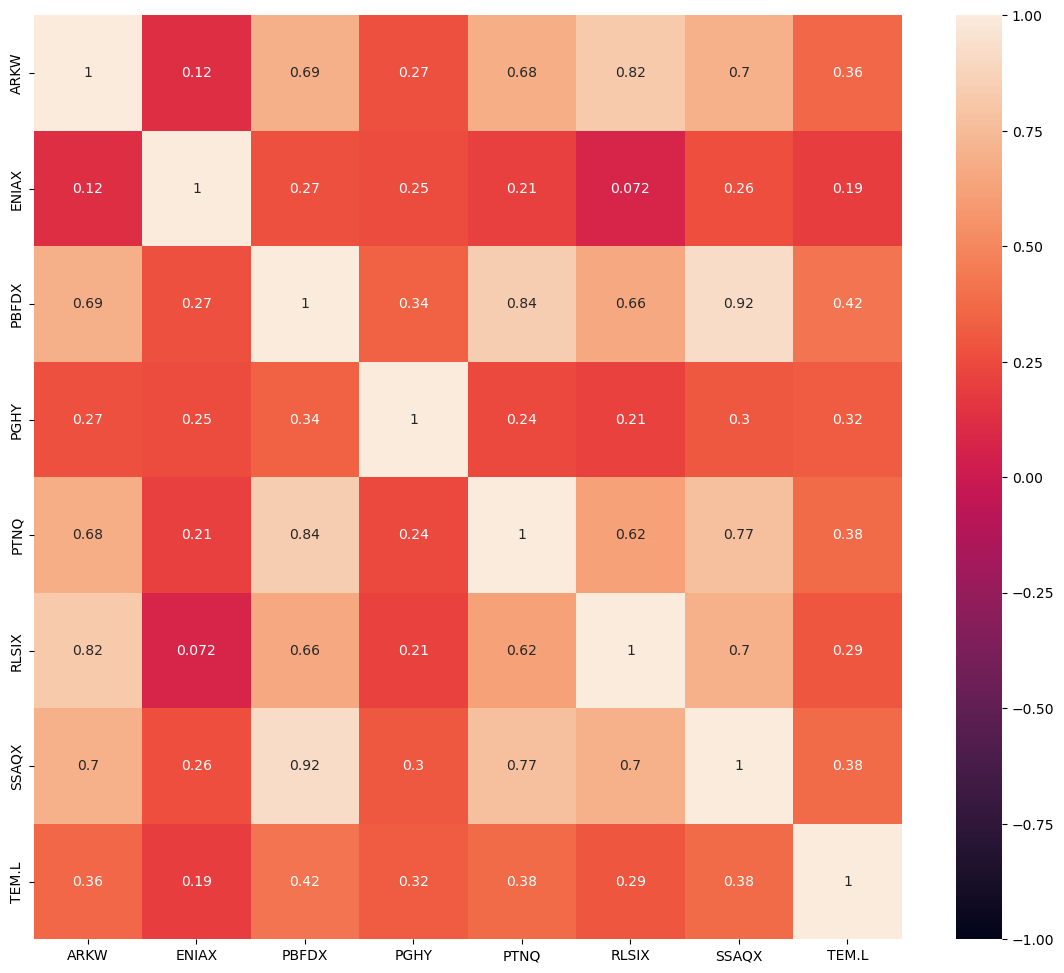

In [52]:
import seaborn as sns
corr_matrix =  mf_data.pct_change().apply(lambda x: np.log(1+x)).corr()
plt.figure(figsize=(14, 12))  
sns.heatmap(data=corr_matrix, annot=True, vmin=-1,vmax=1)

## Iterative Approach to Refining Covariance and Correlation in Portfolio Management

Refining the covariance and correlation matrices is a dynamic process in portfolio management, especially when adding or removing stocks or mutual funds. The goal is to continuously adapt the portfolio to changes in market dynamics and maintain an optimal balance of risk and reward.

### The Iterative Process

1. **Initial Setup**: Start with an existing portfolio and calculate the current covariance and correlation matrices using historical returns.

2. **Adding Assets**:
    - **Potential Addition Analysis**: Evaluate the impact of adding a new asset by calculating how it would change the portfolio's overall risk profile.
    - **Covariance and Correlation Adjustment**: Update the matrices to include the new asset and analyze how this affects the interrelationships between assets.
    - **Diversification Check**: Ensure that the new asset contributes to portfolio diversification, ideally looking for low to negative correlations with existing assets.

3. **Removing Assets**:
    - **Impact Assessment**: Before removing an asset, assess the change in portfolio risk and potential loss of diversification.
    - **Matrix Update**: Recalculate the covariance and correlation matrices without the asset to understand the new risk dynamics.

4. **Rebalancing**:
    - **Portfolio Optimization**: Use the updated matrices to determine the new optimal weights for all assets in the portfolio.
    - **Rebalancing Trigger**: Establish criteria for when to rebalance, such as a significant change in asset correlations or when the portfolio drifts from its target allocations.

5. **Monitoring and Adjustment**:
    - **Continuous Monitoring**: Regularly monitor the portfolio's performance and the prevailing financial conditions that could affect asset correlations.
    - **Proactive Adjustment**: Be prepared to make proactive adjustments, adding or removing assets as needed to optimize portfolio performance.

### Conclusion

This iterative process ensures that a portfolio stays aligned with the investor's risk tolerance and investment goals. By continuously adjusting the covariance and correlation matrices with each change in the portfolio's composition, investors can maintain an effective and efficient investment strategy that is responsive to market conditions.


## Construction of an Equally Weighted Portfolio

An equally weighted portfolio is a simple investment strategy where each asset is allocated the same proportion of the total investment. This approach assumes that all investments have the same expected return and risk profile, which can be an effective strategy for diversification.

### Advantages of an Equally Weighted Portfolio

1. **Simplicity**: Easy to understand and implement.
2. **Diversification**: Helps to spread out risk across various assets.
3. **Rebalancing**: Forces regular rebalancing, potentially capturing gains from different assets over time.


In [53]:
# Number of funds in the dataset
no_of_funds = len(mf_data.columns)

# Calculate equal weight for each fund
equal_weight = 1 / no_of_funds

# Generate a list of fund names
fund_list = mf_data.columns.values.tolist()

# Create a dictionary to hold the weight for each fund
weights_dict = {fund: equal_weight for fund in fund_list}

# Output the weights and the number of funds
print("Equal Weights for Each Fund:")
print(weights_dict)
print(f"Number of Funds: {no_of_funds}")

Equal Weights for Each Fund:
{'ARKW': 0.125, 'ENIAX': 0.125, 'PBFDX': 0.125, 'PGHY': 0.125, 'PTNQ': 0.125, 'RLSIX': 0.125, 'SSAQX': 0.125, 'TEM.L': 0.125}
Number of Funds: 8


## Portfolio Variance and Standard Deviation Calculation

Portfolio variance and standard deviation are critical measures of total portfolio risk. Variance measures the dispersion of returns around the mean, while standard deviation provides a measure of risk that can be felt and understood more intuitively as it is in the same units as the returns.

### Calculation Process

1. **Portfolio Variance (`port_var`)**: Calculated by squaring the weights, multiplying by the covariance matrix, and summing all values. It represents the collective risk of the portfolio considering the inter-asset return correlations.

2. **Portfolio Standard Deviation (`port_sd`)**: The square root of the portfolio variance, giving us the volatility of the portfolio's returns. A higher standard deviation indicates a higher risk and potential for wider fluctuations in portfolio value.

The calculated portfolio variance and standard deviation help in understanding the risk profile of the equally weighted portfolio.


In [54]:
   # Calculate portfolio variance
port_var = (cov_matrix * equal_weight**2).sum().sum()
port_sd = np.sqrt(port_var)

# Output portfolio variance and standard deviation
print(f"Portfolio Variance: {port_var}")
print(f"Portfolio Standard Deviation: {port_sd}")

# Calculate annualized expected returns for individual assets
annualized_return = mf_data.resample('Y').last().pct_change().mean()

# Output individual expected returns
print("Annualized Expected Returns for Individual Assets:")
print(annualized_return)


Portfolio Variance: 8.095551458674623e-05
Portfolio Standard Deviation: 0.008997528248732884
Annualized Expected Returns for Individual Assets:
ARKW     0.362307
ENIAX    0.030021
PBFDX    0.139478
PGHY     0.023949
PTNQ     0.158209
RLSIX    0.109778
SSAQX    0.133099
TEM.L    0.056276
dtype: float64


## Expected Returns for Individual Assets

Expected returns are a forward-looking estimate of the average return an asset is projected to produce in the future.

### Calculation Process

1. **Annualized Expected Returns (`annualized_return`)**: We calculate these by resampling the mutual fund data to yearly frequency, computing the percent change, and then taking the mean of these changes. The result is an estimate of each asset's annual return based on past performance.

By analyzing the expected returns in conjunction with the risk (as measured by the standard deviation), we can make more informed decisions about which assets to include in our portfolio to achieve an optimal balance of risk and return.


## Calculation of Portfolio Expected Return

The expected return of a portfolio is a weighted average of the expected returns of the individual assets in the portfolio. For an equally weighted portfolio, each asset contributes equally to the overall expected return.

### Calculation Process

1. **Equal Weights**: We create a list of equal weights, where each weight corresponds to the proportion of total capital allocated to each asset in the portfolio.

2. **Portfolio Expected Return (`port_er`)**: To calculate the portfolio's expected return, we multiply the list of equal weights with the individual expected returns and sum the results. This gives us a single value that represents the average return we might expect from the portfolio based on historical data.

The calculated portfolio expected return is a fundamental input in the decision-making process, helping investors to align their portfolio choices with their return objectives.


In [55]:
# Construct an equally weighted portfolio
weights = [equal_weight] * no_of_funds

# Calculate the expected return of the portfolio
portfolio_expected_return = sum(weights * annualized_return)

# Output the expected return of the portfolio
print(f"Portfolio Expected Return: {portfolio_expected_return}")

# Verify the length of the weights list
print(f"Number of Assets in Portfolio: {len(weights)}")


Portfolio Expected Return: 0.12663957586705996
Number of Assets in Portfolio: 8


## Annualized Standard Deviation of Returns

Annualized standard deviation is a measure of how much the return on an asset or portfolio deviates from its mean over a year, which helps investors understand the amount of risk involved.

### Calculation Process

1. **Daily Returns**: We first calculate the percentage change in value to obtain daily returns.

2. **Logarithmic Returns**: Applying the logarithmic return formula `log(1 + daily return)` helps in normalizing the returns, especially when dealing with volatile assets.

3. **Daily Standard Deviation**: The standard deviation of these logarithmic returns gives us a measure of daily volatility.

4. **Annualization**: Since there are typically 252 trading days in a year, we annualize the daily standard deviation by multiplying it by the square root of 252.

The resulting annualized standard deviation for each asset in the portfolio is an important risk metric, providing insight into the expected volatility of each investment over a typical year.


In [56]:
# Calculate the daily standard deviation of returns
daily_std = mf_data.pct_change().apply(lambda x: np.log(1+x)).std()

# Annualize the daily standard deviation
annualized_std = daily_std * np.sqrt(252)

# Output the annualized standard deviation for each asset
print("Annualized Standard Deviation for Each Asset:")
print(annualized_std)


Annualized Standard Deviation for Each Asset:
ARKW     0.376301
ENIAX    0.023702
PBFDX    0.188943
PGHY     0.074317
PTNQ     0.168465
RLSIX    0.226399
SSAQX    0.184596
TEM.L    0.188074
dtype: float64


## Compilation of Asset Metrics: Returns and Volatility

To evaluate the potential assets for inclusion in our portfolio, we compile key performance metrics into a single DataFrame. This consolidated view includes expected returns and the corresponding volatility for each asset.

### Process Overview

1. **Combination of Metrics**: We concatenate the individual expected returns and the annualized standard deviations side by side, resulting in a two-column DataFrame.

2. **Column Naming**: The columns are named 'Returns' and 'Volatility' to clearly indicate the metrics they represent.

3. **Resulting DataFrame**: The resulting `assets` DataFrame is a concise summary that can be used to assess each asset's risk-return profile, aiding in the investment decision-making process.

With this structured data, we can easily visualize the trade-offs between expected returns and the associated risks, and strategically select assets that align with our investment goals and risk tolerance.


In [57]:
# Combine the expected returns and the annualized standard deviation into one DataFrame
assets = pd.concat([annualized_return, annualized_std], axis=1)

# Assign column names to the DataFrame
assets.columns = ['Returns', 'Volatility']

# Display the assets DataFrame with returns and volatility
print(assets)


        Returns  Volatility
ARKW   0.362307    0.376301
ENIAX  0.030021    0.023702
PBFDX  0.139478    0.188943
PGHY   0.023949    0.074317
PTNQ   0.158209    0.168465
RLSIX  0.109778    0.226399
SSAQX  0.133099    0.184596
TEM.L  0.056276    0.188074


## Scatter Plot: Risk vs. Return Analysis

Visualizing the risk-return profile of each asset helps in understanding the trade-offs involved in portfolio construction. A scatter plot with annualized standard deviation on the x-axis and expected returns on the y-axis provides a clear graphical representation of this relationship.

### Visualization Insights

1. **Plot Interpretation**: Each point on the scatter plot represents an asset. The x-coordinate denotes its volatility (annualized standard deviation), and the y-coordinate indicates its expected return.

2. **Risk-Return Trade-off**: Generally, higher returns come with higher risk (volatility). This plot allows us to identify assets that might offer higher returns for a given level of risk.

3. **Portfolio Diversification**: Ideally, a diversified portfolio includes assets spread across different levels of risk and return, minimizing overall risk while maximizing returns.

This scatter plot is a fundamental tool in the preliminary analysis of potential investments, guiding the decision-making process towards a more balanced and diversified portfolio.


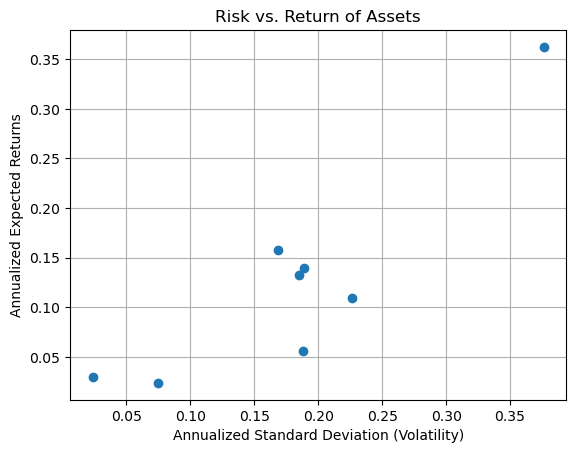

In [58]:
# Scatter plot of annualized standard deviation vs. individual expected returns
plt.scatter(assets['Volatility'], assets['Returns'])
plt.title('Risk vs. Return of Assets')
plt.xlabel('Annualized Standard Deviation (Volatility)')
plt.ylabel('Annualized Expected Returns')
plt.grid(True)
plt.show()


## Simulation of Random Portfolios

To understand the range of potential investment outcomes, we simulate a large number of random portfolios. Each portfolio has a unique combination of weights allocated to different assets, allowing us to explore a wide spectrum of risk-return profiles.

### Process of Portfolio Simulation

1. **Random Weight Allocation**: For each portfolio, weights are randomly assigned to each asset and normalized so they sum up to 1.

2. **Expected Return Calculation**: The expected return of each portfolio is computed as the weighted average of the expected returns of the individual assets.

3. **Volatility Calculation**: The volatility (annualized standard deviation) of each portfolio is derived from the covariance matrix, taking into account the interrelationships between different asset returns.

4. **Result Analysis**: By analyzing the returns and volatility of these portfolios, we can identify the range of possible outcomes and make informed decisions about risk tolerance and potential returns.

### Insights from Simulation

- **Efficient Frontier Identification**: This process helps in sketching out the Efficient Frontier, which highlights the set of portfolios offering the highest expected return for a given level of risk.
- **Optimal Portfolio Discovery**: Among these simulated portfolios, we can identify the one with the maximum Sharpe Ratio, indicating an optimal balance of risk and return.

This simulation is an essential part of modern portfolio theory and aids investors in understanding the implications of different asset allocations.


In [59]:
# Initialize lists to store portfolio returns, volatility, and weights
p_ret, p_vol, p_weights = [], [], []

# Number of portfolios to simulate
num_portfolios = 10000

# Generating random portfolios
for _ in range(num_portfolios):
    # Randomly assign weights to the assets and normalize them
    weights = np.random.random(no_of_funds)
    weights /= np.sum(weights)
    p_weights.append(weights)

    # Calculate expected portfolio return
    returns = np.dot(weights, annualized_return)
    p_ret.append(returns)

    # Calculate portfolio variance and annualized standard deviation (volatility)
    var = np.dot(weights.T, np.dot(cov_matrix, weights))
    volatility = np.sqrt(var) * np.sqrt(252)
    p_vol.append(volatility)

# Output the number of items in each list
print(f"Number of items in Portfolio Volatility list: {len(p_vol)}")
print(f"Number of items in Portfolio Return list: {len(p_ret)}")
print(f"Number of items in Portfolio Weights list: {len(p_weights)}")


Number of items in Portfolio Volatility list: 10000
Number of items in Portfolio Return list: 10000
Number of items in Portfolio Weights list: 10000


## Creation of Portfolio DataFrame

To analyze the simulated random portfolios, we compile all relevant data into a DataFrame. This DataFrame includes the expected returns, volatility, and the allocation weight for each asset in every portfolio.

### Composition of the DataFrame

1. **Returns and Volatility**: The DataFrame starts with two key columns - 'Returns' and 'Volatility', representing the expected return and risk (volatility) of each portfolio.

2. **Asset Weights**: For each asset in the portfolio, we add a column showing its weight in every simulated portfolio. These are labeled with the asset's symbol followed by '_weight'.

3. **Data Aggregation**: The resulting DataFrame, `portfolios`, provides a comprehensive view of each simulated portfolio's characteristics, allowing for detailed analysis and


In [60]:
# Creating a dictionary to hold portfolio data
portfolio_data = {'Returns': p_ret, 'Volatility': p_vol}

# Adding individual asset weights to the portfolio data
for counter, symbol in enumerate(mf_data.columns.to_list()):
    portfolio_data[symbol + '_weight'] = [weights[counter] for weights in p_weights]

# Converting the dictionary to a DataFrame for easy analysis
portfolios = pd.DataFrame(portfolio_data)

# Display the first few rows of the portfolio DataFrame
portfolios.head()


,Returns,Volatility,ARKW_weight,ENIAX_weight,PBFDX_weight,PGHY_weight,PTNQ_weight,RLSIX_weight,SSAQX_weight,TEM.L_weight
0,0.140595,0.147931,0.138666,0.202674,0.128293,0.037063,0.202322,0.080796,0.166379,0.043807
1,0.078250,0.108721,0.000232,0.220485,0.239892,0.113262,0.013394,0.085271,0.071154,0.256310
2,0.114899,0.130014,0.054202,0.117023,0.195340,0.137619,0.191875,0.051348,0.143165,0.109429
3,0.121816,0.140890,0.109218,0.077588,0.050021,0.130641,0.213692,0.140560,0.063940,0.214340
4,0.123867,0.144899,0.106602,0.145076,0.185130,0.083408,0.116848,0.189991,0.051985,0.120961


##  The Efficient Frontier
The Efficient Frontier is a concept in modern portfolio theory, represented as a curve on a graph that plots the return of portfolios against their level of risk (volatility). Here are key points about the Efficient Frontier:

1. **Optimal Portfolios:** It consists of portfolios that provide the highest expected return for a given level of risk or the lowest risk for a given level of expected return.

2. **Risk-Return Trade-Off:** The curve demonstrates the trade-off between risk and return where no additional expected return can be gained without increasing the level of risk.

3. **Investment Decision-Making:** Investors use the Efficient Frontier to choose portfolios that align with their risk tolerance and return objectives. Portfolios that lie on the curve are considered optimal, whereas those below the curve are sub-optimal.

4. **Dynamic Nature:** The shape and position of the Efficient Frontier can change over time as asset returns and correlations fluctuate.

The scatter plot visualizes these concepts, with portfolios on the Efficient Frontier typically appearing on the upper left boundary of the plotted points, offering the most favorable risk-return combinations.






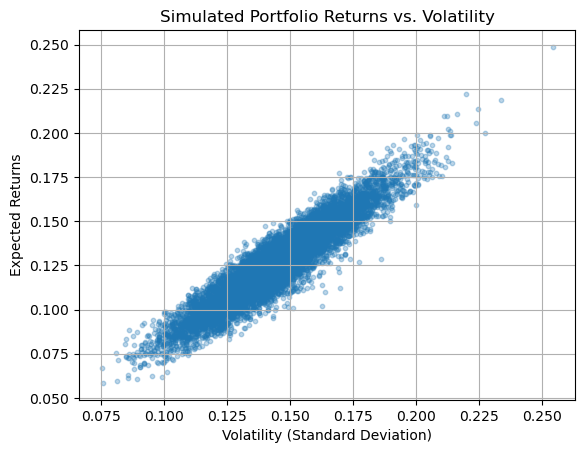

In [61]:
# Scatter plot of Returns vs. Volatility for the simulated portfolios
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True)
plt.title('Simulated Portfolio Returns vs. Volatility')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Returns')
plt.show()


## Portfolio Returns vs. Volatility Scatter Plot

The scatter plot above illustrates the risk-return profile of a series of simulated portfolios. Each point represents a different portfolio configuration with a unique asset allocation.

### Graph Explanation

- **X-Axis (Volatility)**: Measures the standard deviation of the portfolio's returns, representing the level of risk. Portfolios further to the right on the graph exhibit higher volatility and, consequently, higher risk.

- **Y-Axis (Returns)**: Indicates the expected return of the portfolio. Higher points on the graph correspond to a higher expected annual return.

- **Point Density**: Areas with a higher concentration of points show the most common risk-return profiles for the randomly generated portfolios.

- **Portfolio Distribution**: The distribution of points typically forms a shape that fans out to the upper right. This pattern reflects the increasing variability of returns as the risk (volatility) increases. In general, as investors take on more risk, they expect higher returns to compensate for that increased risk.

- **Efficient Frontier (Not Shown):** While not explicitly marked on this graph, the upper edge of the plotted area would represent the Efficient Frontier if these points included all possible portfolio combinations. The Efficient Frontier is the set of portfolios that maximize returns for a given level of risk or minimize risk for a given level of return.



This visualization is crucial for investors to understand the potential trade-offs between risk and return within their investment strategy. It can guide them in selecting a portfolio that aligns with their risk tolerance and investment objectives.

In [62]:
# Find the portfolio with the minimum volatility
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]

# Display the portfolio with the minimum volatility
min_vol_port


Returns         0.067019
Volatility      0.075173
ARKW_weight     0.019069
ENIAX_weight    0.418392
PBFDX_weight    0.168436
PGHY_weight     0.202466
PTNQ_weight     0.008376
RLSIX_weight    0.064083
SSAQX_weight    0.053894
TEM.L_weight    0.065283
Name: 6636, dtype: float64

## Minimum Volatility Portfolio

The portfolio marked by the orange star represents the Minimum Volatility Portfolio from the set of simulated portfolios. This specific portfolio configuration has the lowest risk, as measured by standard deviation, without necessarily sacrificing all potential returns. It is an optimal choice for risk-averse investors seeking to minimize the unpredictability of their investment returns.


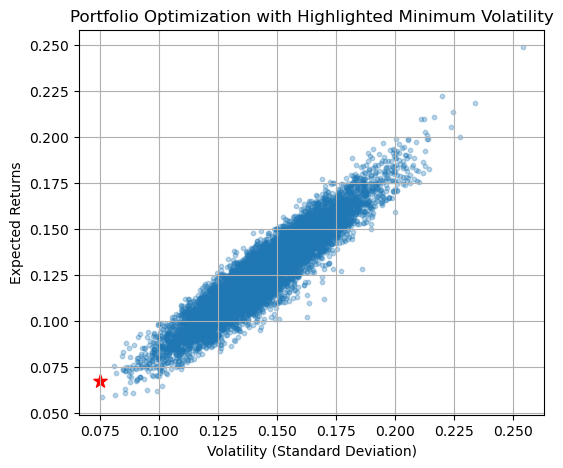

In [63]:
# Set up the figure size for the plot
plt.subplots(figsize=[6,5])

# Create a scatter plot for the entire set of portfolios
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=10, alpha=0.3)

# Highlight the minimum volatility portfolio with a larger, distinct marker
plt.scatter(min_vol_port['Volatility'], min_vol_port['Returns'], color='red', marker='*', s=100)

# Set plot title and labels
plt.title('Portfolio Optimization with Highlighted Minimum Volatility')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Returns')

# Show grid
plt.grid(True)

# Display the plot
plt.show()


## Interpretation of the Scatter Plot

The scatter plot visualizes the risk-return profile of numerous simulated portfolios. The x-axis indicates volatility, and the y-axis represents expected returns. The dense cluster of points shows the range of potential portfolio outcomes. The orange star highlights the portfolio with the least risk, which is often sought after by conservative investors who prioritize stability in their investment returns.

## Optimal Risk-Adjusted Return Portfolio

The optimal risk-adjusted return portfolio is identified by maximizing the Sharpe Ratio, which is the industry-standard measure for calculating the additional return per unit of risk that an investment provides over the risk-free rate.

### Sharpe Ratio Calculation

The Sharpe Ratio is calculated using the formula:

Sharpe Ratio = (Expected Portfolio Return - Risk-Free Rate) / Portfolio Standard Deviation

- **Portfolio Return**: The expected return of the portfolio.
- **Risk-Free Rate**: The return of a risk-free asset, typically Treasury bills. For this analysis, we've used an assumed risk-free rate of 1% (rf = 0.01).
- **Portfolio Volatility**: The standard deviation of the portfolio's returns, representing risk.

### Identifying the Optimal Portfolio

We calculate the Sharpe Ratio for each simulated portfolio and identify the one with the highest ratio. This portfolio offers the best return for the level of risk taken, relative to a risk-free investment.

The portfolio with the highest Sharpe Ratio, denoted in the code as `optimal_risk_port`, is considered the most desirable for risk-aware investors seeking to maximize their risk-adjusted returns.


In [64]:
# Risk-free rate
rf = 0.01

# Calculate the Sharpe Ratio for each portfolio
sharpe_ratios = (portfolios['Returns'] - rf) / portfolios['Volatility']

# Find the portfolio with the highest Sharpe Ratio
optimal_risk_port = portfolios.iloc[sharpe_ratios.idxmax()]

# Display the optimal risk-adjusted return portfolio
optimal_risk_port


Returns         0.177132
Volatility      0.169342
ARKW_weight     0.344412
ENIAX_weight    0.323820
PBFDX_weight    0.026147
PGHY_weight     0.039029
PTNQ_weight     0.190884
RLSIX_weight    0.015561
SSAQX_weight    0.035848
TEM.L_weight    0.024299
Name: 1894, dtype: float64

## Portfolio Optimization Scatter Plot

The scatter plot visualizes a range of simulated investment portfolios based on their expected returns and volatility. The orange star marks the portfolio with the minimum volatility, ideal for risk-averse investors. The green star represents the portfolio with the maximum Sharpe Ratio, indicating the best risk-adjusted return.


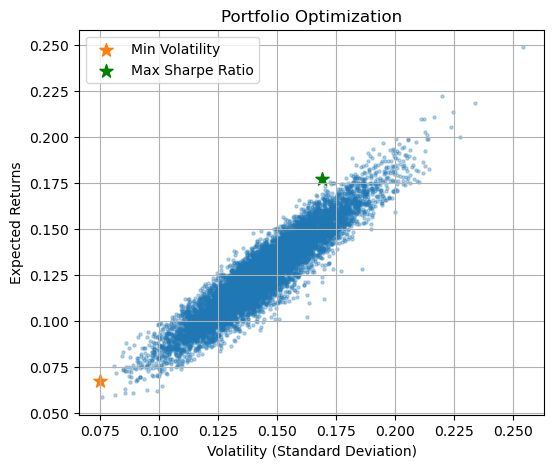

In [65]:
# Set up the figure size for the plot
plt.subplots(figsize=[6,5])

# Scatter plot for all portfolios with small opacity to see the density
plt.scatter(portfolios['Volatility'], portfolios['Returns'], marker='o', s=5, alpha=0.3)

# Highlight the minimum volatility portfolio with an orange star marker
plt.scatter(min_vol_port['Volatility'], min_vol_port['Returns'], marker='*', s=100, label='Min Volatility')

# Highlight the optimal risk-adjusted return portfolio with a green star marker
plt.scatter(optimal_risk_port['Volatility'], optimal_risk_port['Returns'], marker='*', s=100, color='g', label='Max Sharpe Ratio')

# Adding plot labels and title
plt.title('Portfolio Optimization')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Returns')

# Show legend
plt.legend()

# Show the plot with grid
plt.grid(True)
plt.show()


## Analysis of Results

The graph provides a visual representation of the risk-return trade-off inherent in portfolio selection. The concentration of blue dots forms a pattern that highlights the relationship between higher returns and increased risk. The key portfolios, marked with stars, demonstrate the extremes of this trade-off: one prioritizes stability, while the other balances risk for optimal returns.







In this analysis, we've gone through the process of optimizing a stock/mutual fund portfolio by maximizing the Sharpe Ratio. This approach provided us with insights into the risk and return characteristics of potential investments and aided in making an informed investment decision based on quantitative metrics.

Please note that this analysis is based on historical data and future performance may vary. Investors are advised to perform their own due diligence before making investment decisions.


## Next Steps

Future iterations of this project could include:
- Including more assets to diversify the portfolio further.
- Incorporating additional risk factors like Beta or Alpha.
- Using different optimization algorithms like Genetic Algorithms or Particle Swarm Optimization.
- Considering transaction costs and other real-world constraints in the optimization process.
